# Logistic Regression

Logistic regression is an <b>algorithm of binary classification</b> used in a supervised learning problem when the output y are all either zero or one. (*For Example*: Cat vs No-cat).

<br>
The <b>goal</b> of logistic regression is to minimize the error between its predictions and training data.

<br>
Logistic regression is a Neural Network which has one hidden layer with a single hidden node and the identity activation function, and a single output node with the logistic sigmoid activation function.

<br>
The <b>neuron</b> computes a linear function ($z=wx+b$) followed by an activation function($\:\widehat{y}=a=\sigma(z)$).

<br>
Given an image represented by a feature vector x, the algorithm will evaluate the probability of a cat being in that image.
$$Given\: x, \widehat{y}=P(y=1|x),\: where\: 0≤\widehat{y}≤1$$

<br>
The parameters used in Logistic regression are:


*   The input features vector: $\:x∈ℝ^{x_{n}}$, where $\:x_{n}\:$ is the number of features
*   The training label:  $\:y∈0,1$
*   The weights: $\:w∈ℝ^{x_{n}}$, where $\:x_{n}\:$ is the number of features
*   The threshold: $\:b∈ℝ$
*  <b> The output:</b> $\widehat{y}^{(i)}=\sigma(w^{T}x^{(i)}+b),$ where  $x^{i}$ the i-th traning example.


<br>

$(w^{T}x+b)$ is a linear function, but since we are looking for a probability constraint between [0,1], the <b>Sigmoid function</b> is used:
$\sigma(z^{(i)})=\frac{1}{1+e^{-z^{(i)}}}$.



The function is bounded between [0,1].

<br>
Some observations:

*  If $z$ is a large positive number, then $\sigma(z)=1$
*  If $z$ is small or large negative number, then $\sigma(z)=0$
*  If $z=0$, then $\sigma(z)=0.5$

### Logistic Regression: Cost Function

We needed to define a cost function to train the parameters w and b.


We want$\:\widehat{y}^{(i)}\approx{y^{(i)}}$.

The <b>loss (error) function</b> measures the discrepancy between the prediction $(\widehat{y}^{(i)})$ and the desired output $(y^{(i)})$.
In other words, the loss function computes the error for a single training example. 

$L(\widehat{y}^{(i)},y^{(i)})=\frac{1}{2}(\widehat{y}^{(i)}-y^{(i)})^2$

$L(\widehat{y}^{(i)},y^{(i)})=-(y^{(i)}log(\widehat{y}^{(i)})+(1-y^{(i)})log(1-\widehat{y}^{(i)})$

*  If $y^{(i)}=1:$ $L(\widehat{y}^{(i)},y^{(i)})=-log(\widehat{y}^{(i)})$ where $log(\widehat{y}^{(i)})$ and $y^{(i)}$ should be close to 1
*  If $y^{(i)}=0:$ $L(\widehat{y}^{(i)},y^{(i)})=-log(1-\widehat{y}^{(i)})$ where $log(1-\widehat{y}^{(i)})$ and $y^{(i)}$ should be close to 0

<b>Cost function:</b>

The cost function is the average of the loss function of the entire training set. We are going to find the parameters $w$ and $b$ that minimize the overall cost function.
$$J(w,b)=\frac{1}{m}\sum_{i=1}^mL(\widehat{y}^{(i)},y^{(i)})=-\frac{1}{m}\sum_{i=1}^m[(y^{(i)}log(\widehat{y}^{(i)})+(1-y^{(i)}log(1-\widehat{y}^{(i)})]$$

## __________________________________

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Data set

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=300, centers=2, n_features=2,random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_test = X_test.transpose()
X_train = X_train.transpose()
X_train.shape

(2, 240)

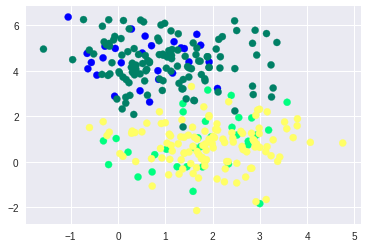

In [9]:
fig = plt.figure()

plt.scatter(X_test[0], X_test[1], c=y_test, s=50, cmap='winter')
plt.scatter(X_train[0], X_train[1], c=y_train, s=50, cmap='summer')

plt.show()

### NumPy implementation of Logistic Regression

$$\sigma(z)=\sigma(w^{T}x+b)=\frac{1}{1+e^{-(w^{T}x+b)}}$$

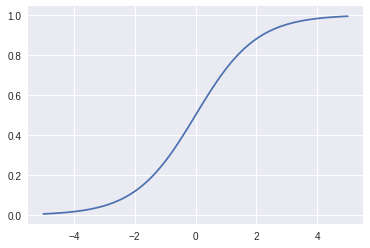

In [10]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s


x = np.linspace(-5, 5, 100)
import matplotlib.pyplot as plt
plt.plot(x, sigmoid(x))

In [11]:
def initialize_with_zeros(dim):
    
    w = np.zeros(shape=(dim, 1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b
  
initialize_with_zeros(10)[0].shape

(10, 1)

<b>Forward Propagation computes:</b>

activation
$$A=\sigma(w^{T}x+b)=(a^{1}, a^{2}, ..., a^{m})$$

and Cost function:

$$J=-\frac{1}{m}\sum_{i=1}^my^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$$

<b>Backward Propagation computes:</b>

dw

$$\frac{dJ}{dw}=\frac{1}{m}X(A-Y)^T$$

db

$$\frac{dJ}{db}=\frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)})$$

In [0]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION TO FIND COST (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                        # compute activation
    cost = (-1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))    # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

### Gradient Descent

$$w:=w-\alpha\cdot\frac{dJ(w,b)}{dw}$$

$$b:=b-\alpha\cdot\frac{dJ(w,b)}{db}$$

Optimization goal is to learn $w$ and $b$ by minimizing the cost function J. 
For a parameter $\theta$ the update rule is:

$\theta=\theta-\alpha d\theta$, where  $\alpha$ - learning rate

In [0]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
        
    costs = []
    
    for i in range(num_iterations):
        
        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

There is two steps to computing predictions:

1. Prediction calculates labels $\widehat{Y}=A=\sigma(w^{T}X+b)$
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [0]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

### Merge all functions into a model

In [0]:
def model(X_train, Y_train, X_test, Y_test,num_iterations=200, learning_rate=0.5, print_cost=False):
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[0])
    
    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
        
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [0]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
d = model(X_train, 
          y_train, 
          X_test, 
          y_test, 
          num_iterations=50000, 
          learning_rate=0.001, 
          print_cost=True)



In [0]:
X_test.transpose()

In [18]:
w, b = (d['w'], d['b'])

y_predicted = predict(w, b, X_test).astype(int)

y_predicted

array([[1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1]])

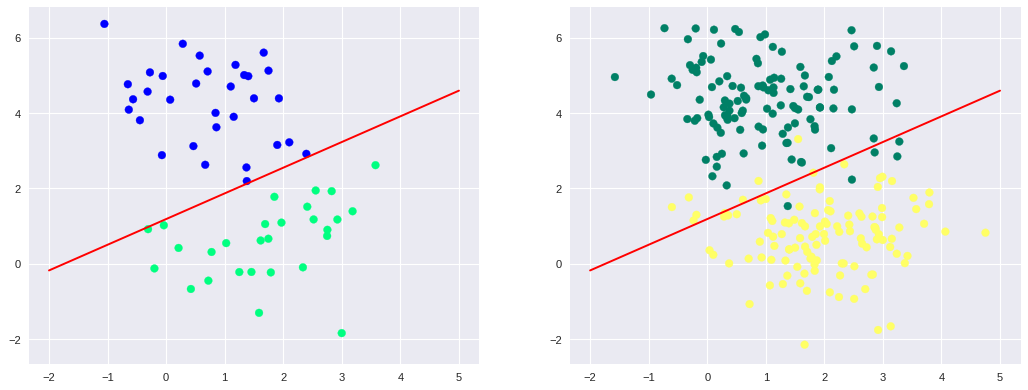

In [19]:
fig = plt.figure()

fig = plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, sharey=ax1)

ax1.scatter(X_test[0], X_test[1], c=y_predicted[0], cmap='winter')
ax2.scatter(X_train[0], X_train[1], c=y_train, cmap='summer')

y = lambda x, w, b: -(b + w[0] * x)/w[1]


x = np.linspace(-2, 5, 30)

ax1.plot(x, y(x, w, b), '-', c="red")
ax2.plot(x, y(x, w, b), '-', c="red")

plt.show()

## Logistic Regression with Scikit-Learn 

In [20]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train.transpose(), y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
predicted = log_reg.predict(X_test.transpose())
# predicted
# X_test|

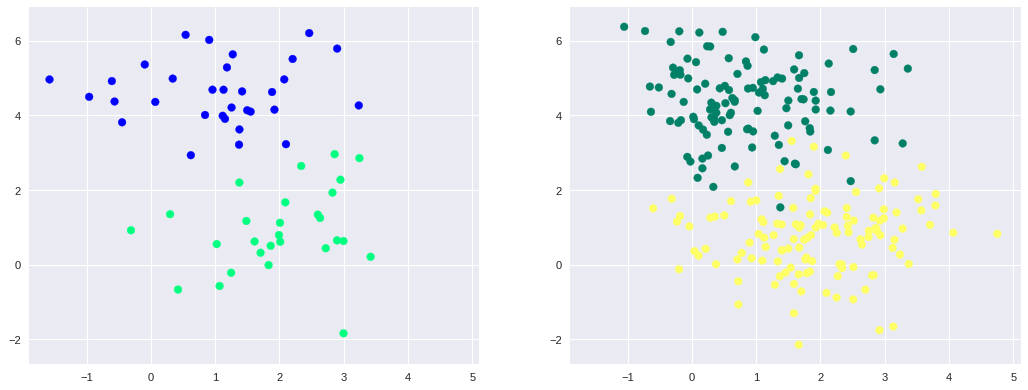

In [19]:
fig = plt.figure()

fig = plt.figure(figsize=(16, 13), dpi= 80, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2, sharex=ax1, sharey=ax1)

ax1.scatter(X_test[0], X_test[1], c=y_predicted[0],  cmap='winter')
ax2.scatter(X_train[0], X_train[1], c=y_train, cmap='summer')

plt.show()

### Classify MNIST

In [21]:
from sklearn.datasets import fetch_mldata
# Change data_home to wherever to where you want to download your data
mnist = fetch_mldata('MNIST original')


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [22]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , mnist.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", mnist.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


In [0]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [91]:
print(train_img.shape)

(60000, 784)


In [92]:
print(train_lbl.shape)

(60000,)


In [93]:
print(test_img.shape)

(10000, 784)


In [94]:
print(test_lbl.shape)

(10000,)


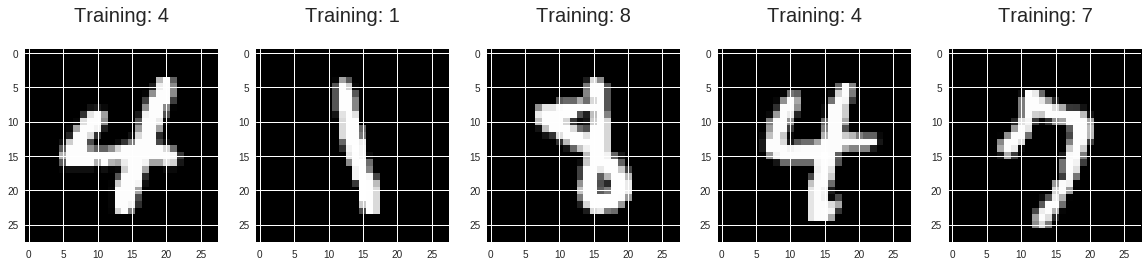

In [95]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)



In [0]:
from sklearn.linear_model import LogisticRegression

In [102]:
# separate 8

eights_train = train_lbl == 8
eights_train

array([False, False,  True, ..., False, False,  True])

In [0]:
eights_train = eights_train.astype(int)

In [0]:
#eights_train = eights_train[:, np.newaxis]

In [103]:
eights_test = test_lbl == 8
eights_test = eights_test.astype(int)
#eights_test = eights_test[:, np.newaxis]
eights_test.shape

(10000,)

In [104]:
d = model(train_img.T, 
          eights_train, 
          test_img.T, 
          eights_test, 
          num_iterations=55, 
          learning_rate=0.001, 
          print_cost=True)

Cost after iteration 0: 0.693147


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


train accuracy: 90.91 %
test accuracy: 90.98 %


In [109]:
w, b = (d['w'], d['b'])

y_predicted = predict(w, b, test_img[0].T).astype(int)

y_predicted

IndexError: ignored